In [2]:
!git clone https://github.com/AdityaKarn/lane-detection-dataset

Cloning into 'lane-detection-dataset'...
remote: Enumerating objects: 486, done.
remote: Counting objects: 100% (486/486), done.
remote: Compressing objects: 100% (486/486), done.
remote: Total 1083 (delta 0), reused 486 (delta 0), pack-reused 597
Receiving objects: 100% (1083/1083), 112.90 MiB | 27.92 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [5]:
%cd lane-detection-dataset

/content/lane-detection-dataset


In [6]:
!pip3 install noise

     |████████████████████████████████| 133kB 2.6MB/s 
  Created wheel for noise: filename=noise-1.2.2-cp36-cp36m-linux_x86_64.whl size=62471 sha256=40366664d17659c9860027703f5de4e213bda01240ca36e799d8df59d4efd044
  Stored in directory: /root/.cache/pip/wheels/fd/a3/c1/d36defe6e9f074b25dc0f018eb9f8fdd675a7ef87071ce3821
Successfully built noise


In [7]:
import numpy as np
import cv2

import keras 
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

from sklearn.utils import shuffle
from imgaug import augmenters as iaa

import random
import copy 
import os
import pickle
import matplotlib.pyplot as plt

from image_alteration_v2 import default_alter, draw_points
import multiprocessing

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
def img_preprocess(img, right_lane, left_lane):
    img, rl, ll = img_crop(img, right_lane, left_lane)
    img = cv2.resize(img, (WIDTH, cropped_height))

    rl_div_x = (rl[:,0]) / WIDTH
    rl_div_y = (rl[:,1]) / cropped_height
    rl = [rl_div_x, rl_div_y]
    rl = np.asarray(rl)
    rl = rl.transpose()

    ll_div_x = (ll[:,0]) / WIDTH
    ll_div_y = (ll[:,1]) / cropped_height
    ll = [ll_div_x, ll_div_y]
    ll = np.asarray(ll)
    ll = ll.transpose()

    # img = cv2.cvtColor(img, cv2.COLOR)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255
    return img, rl, ll

In [20]:
def img_crop(img, rl, ll):  
    img = img[crop:,:,:]
    rl = np.asarray(rl)
    ll = np.asarray(ll)
    rl[:, 1] -= crop
    ll[:, 1] -= crop
    return img, rl, ll

In [18]:
from keras.models import load_model
model = load_model("model_1.h5")

In [22]:
WIDTH = 240
HEIGHT = 135
crop = int(HEIGHT * 0.259525)
cropped_height = HEIGHT - crop

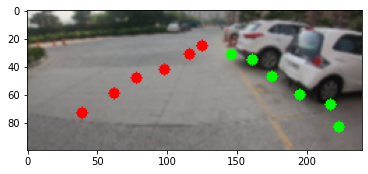

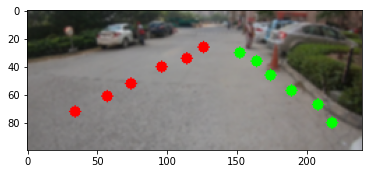

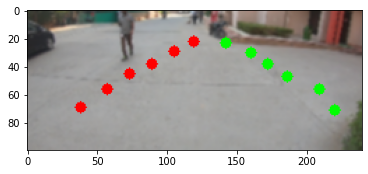

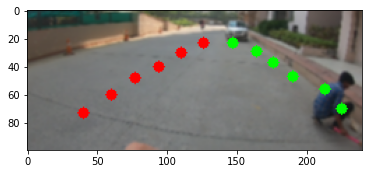

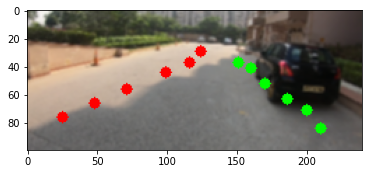

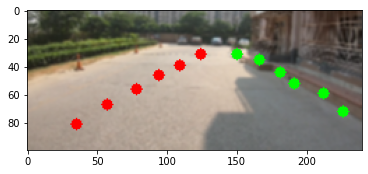

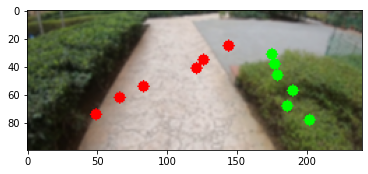

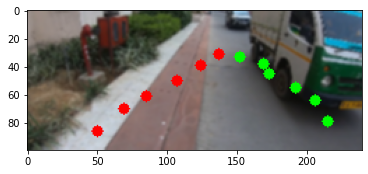

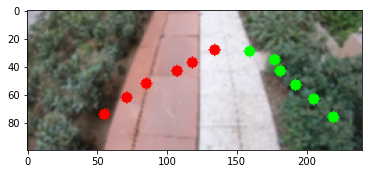

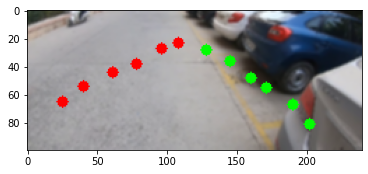

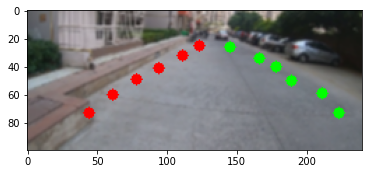

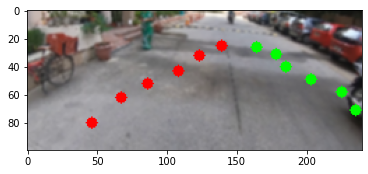

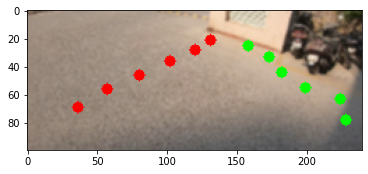

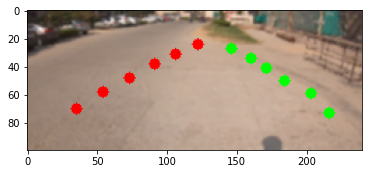

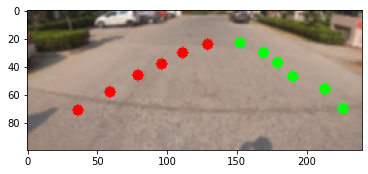

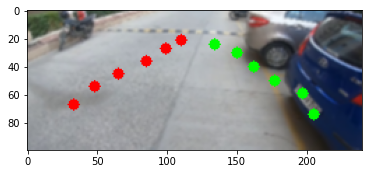

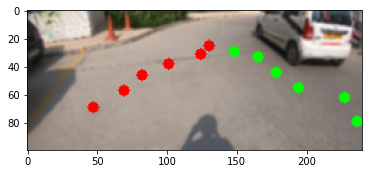

In [23]:
from google.colab.patches import cv2_imshow
val_labels_path = '../gdrive/My Drive/val_labels/'
val_labels_pahts = os.listdir(val_labels_path)
label_path = '../gdrive/My Drive/labels/'
labels_pahts = os.listdir(labels_path)


labels_pahts = sorted(val_labels_pahts)

# label = pickle.load(open(labels_path + label, "rb"))
for _label_path in labels_pahts[10:102]:
    label = pickle.load(open(val_labels_path +_label_path, "rb"))
    img, rl, ll = label['img'], label['right_lane'], label['left_lane']
#     img = cv2.imread('test1.png')
    # if istraining:
        # img, rl, ll = random_augment(img, rl, ll)


    img, rl, ll = img_preprocess(img, rl, ll)
    to_predict = []
    to_predict.append(img)
    to_predict = np.asarray(to_predict)
    prediction = model.predict(to_predict)
    rl = prediction[0,:12]
    ll = prediction[0,12:]
    rl = np.reshape(rl, (6,2))
    ll = np.reshape(ll, (6,2))

    rl_div_x = rl[:,0] * WIDTH
    rl_div_y = rl[:,1] * cropped_height
    rl = [rl_div_x, rl_div_y]
    rl = np.asarray(rl, dtype=np.int32)
    rl = rl.transpose()

    ll_div_x = ll[:,0] * WIDTH
    ll_div_y = ll[:,1] * cropped_height
    ll = [ll_div_x, ll_div_y]
    ll = np.asarray(ll)
    ll = ll.transpose()

    rl = np.array(rl, dtype=np.uint32)
    ll = np.array(ll, dtype=np.uint32)
    img = img * 255
    img = np.array(img, dtype=np.int32)
    img = draw_points(img, rl, ll)
    plt.imshow(img)
    plt.show()